In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("NationalNames.csv")

In [3]:
df.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [4]:
df.shape

(1825433, 5)

In [8]:
total_birth = df.pivot_table("Count", index = "Year", columns = "Gender", aggfunc = sum)

In [9]:
total_birth.head()

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


In [10]:
?df.pivot_table

In [11]:
# pivot_table 예시

df2 = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],                  "D": [1, 2, 2, 3, 3, 4, 5, 6, 7]})
df2

,A,B,C,D
0,foo,one,small,1
1,foo,one,large,2
2,foo,one,large,2
3,foo,two,small,3
4,foo,two,small,3
5,bar,one,large,4
6,bar,one,small,5
7,bar,two,small,6
8,bar,two,large,7


In [15]:
df2.pivot_table(values='D', index=['A', 'B'], columns = ['C'], aggfunc = np.sum)

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [16]:
total_birth.tail()

Gender,F,M
Year,,
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414
2013,1745339,1881463
2014,1768775,1901376


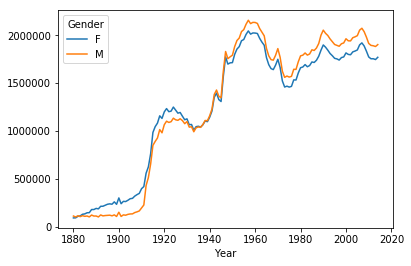

In [17]:
ax = total_birth.plot()

# 각 이름의 출생횟수가 전체에서 차지하는 비율

In [21]:
grouped_names_dict = dict(list(df.groupby(['Year', 'Gender'])))

In [22]:
grouped_names_dict.keys()

dict_keys([(1880, 'F'), (1880, 'M'), (1881, 'F'), (1881, 'M'), (1882, 'F'), (1882, 'M'), (1883, 'F'), (1883, 'M'), (1884, 'F'), (1884, 'M'), (1885, 'F'), (1885, 'M'), (1886, 'F'), (1886, 'M'), (1887, 'F'), (1887, 'M'), (1888, 'F'), (1888, 'M'), (1889, 'F'), (1889, 'M'), (1890, 'F'), (1890, 'M'), (1891, 'F'), (1891, 'M'), (1892, 'F'), (1892, 'M'), (1893, 'F'), (1893, 'M'), (1894, 'F'), (1894, 'M'), (1895, 'F'), (1895, 'M'), (1896, 'F'), (1896, 'M'), (1897, 'F'), (1897, 'M'), (1898, 'F'), (1898, 'M'), (1899, 'F'), (1899, 'M'), (1900, 'F'), (1900, 'M'), (1901, 'F'), (1901, 'M'), (1902, 'F'), (1902, 'M'), (1903, 'F'), (1903, 'M'), (1904, 'F'), (1904, 'M'), (1905, 'F'), (1905, 'M'), (1906, 'F'), (1906, 'M'), (1907, 'F'), (1907, 'M'), (1908, 'F'), (1908, 'M'), (1909, 'F'), (1909, 'M'), (1910, 'F'), (1910, 'M'), (1911, 'F'), (1911, 'M'), (1912, 'F'), (1912, 'M'), (1913, 'F'), (1913, 'M'), (1914, 'F'), (1914, 'M'), (1915, 'F'), (1915, 'M'), (1916, 'F'), (1916, 'M'), (1917, 'F'), (1917, 'M'), (

In [24]:
grouped_names_dict[(2011, 'M')].head(10)

,Id,Name,Year,Gender,Count
1711173,1711174,Jacob,2011,M,20331
1711174,1711175,Mason,2011,M,19488
1711175,1711176,William,2011,M,17314
1711176,1711177,Jayden,2011,M,16954
1711177,1711178,Noah,2011,M,16838
1711178,1711179,Michael,2011,M,16744
1711179,1711180,Ethan,2011,M,16665
1711180,1711181,Alexander,2011,M,15681
1711181,1711182,Aiden,2011,M,15469
1711182,1711183,Daniel,2011,M,15249


In [25]:
def add_prop(agg_df):
    agg_count = agg_df["Count"]
    agg_df["prop"] = agg_count / agg_count.sum()
    return agg_df

In [27]:
names_with_prop = df.groupby(['Year', 'Gender']).apply(add_prop)

In [28]:
names_with_prop.head()

,Id,Name,Year,Gender,Count,prop
0,1,Mary,1880,F,7065,0.077643
1,2,Anna,1880,F,2604,0.028618
2,3,Emma,1880,F,2003,0.022013
3,4,Elizabeth,1880,F,1939,0.021309
4,5,Minnie,1880,F,1746,0.019188


In [29]:
grouped_names_with_prop_dict = dict(list(names_with_prop.groupby(['Year', 'Gender'])))

In [30]:
grouped_sample = grouped_names_with_prop_dict[(2011, 'M')]

In [31]:
grouped_sample.head(10)

,Id,Name,Year,Gender,Count,prop
1711173,1711174,Jacob,2011,M,20331,0.010739
1711174,1711175,Mason,2011,M,19488,0.010294
1711175,1711176,William,2011,M,17314,0.009145
1711176,1711177,Jayden,2011,M,16954,0.008955
1711177,1711178,Noah,2011,M,16838,0.008894
1711178,1711179,Michael,2011,M,16744,0.008844
1711179,1711180,Ethan,2011,M,16665,0.008802
1711180,1711181,Alexander,2011,M,15681,0.008283
1711181,1711182,Aiden,2011,M,15469,0.008171
1711182,1711183,Daniel,2011,M,15249,0.008054


In [33]:
grouped_sample.sort_values('Count', ascending = False).head(10)

,Id,Name,Year,Gender,Count,prop
1711173,1711174,Jacob,2011,M,20331,0.010739
1711174,1711175,Mason,2011,M,19488,0.010294
1711175,1711176,William,2011,M,17314,0.009145
1711176,1711177,Jayden,2011,M,16954,0.008955
1711177,1711178,Noah,2011,M,16838,0.008894
1711178,1711179,Michael,2011,M,16744,0.008844
1711179,1711180,Ethan,2011,M,16665,0.008802
1711180,1711181,Alexander,2011,M,15681,0.008283
1711181,1711182,Aiden,2011,M,15469,0.008171
1711182,1711183,Daniel,2011,M,15249,0.008054


In [34]:
def get_top1000(agg_df):
    top1000_df = agg_df.sort_values('Count', ascending=False).iloc[:1000]
    return top1000_df

In [37]:
top1000_names = names_with_prop.groupby(['Year', 'Gender']).apply(get_top1000)

In [38]:
top1000_names.head()

Id       Name  Year Gender  Count      prop
Year Gender                                               
1880 F      0   1       Mary  1880      F   7065  0.077643
            1   2       Anna  1880      F   2604  0.028618
            2   3       Emma  1880      F   2003  0.022013
            3   4  Elizabeth  1880      F   1939  0.021309
            4   5     Minnie  1880      F   1746  0.019188

In [40]:
names_with_prop.loc[(names_with_prop['Year'] == 2011) & \
                                  (names_with_prop['Gender'] == 'M')].shape

(14329, 6)

In [41]:
top1000_names.loc[(2011, 'M')].shape

(1000, 6)

# 각 연도에 따른 전체 출생횟수 대비 TOP1000 이름들의 출생횟수 비중 산출하기

In [42]:
top1000_names.head()

Id       Name  Year Gender  Count      prop
Year Gender                                               
1880 F      0   1       Mary  1880      F   7065  0.077643
            1   2       Anna  1880      F   2604  0.028618
            2   3       Emma  1880      F   2003  0.022013
            3   4  Elizabeth  1880      F   1939  0.021309
            4   5     Minnie  1880      F   1746  0.019188

In [46]:
top1000_props = top1000_names.pivot_table('prop', index='Year', columns = 'Gender', aggfunc = sum)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:81: FutureWarning: 'Year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:81: FutureWarning: 'Gender' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


In [47]:
top1000_props.head(10)

Gender,F,M
Year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
1885,0.992251,0.995501
1886,0.989504,0.995035
1887,0.988279,0.996697
1888,0.984241,0.992429


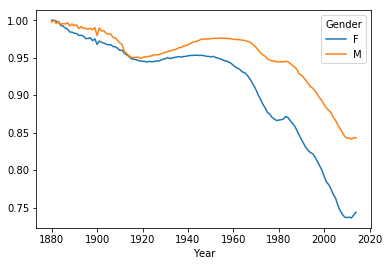

In [48]:
ax = top1000_props.plot()

# 이름이 점점 다양해지고 있다.

# 특정 이름들의 연도에 따른 출생횟수 변화 추이 분석

In [49]:
top1000_names.head()

Id       Name  Year Gender  Count      prop
Year Gender                                               
1880 F      0   1       Mary  1880      F   7065  0.077643
            1   2       Anna  1880      F   2604  0.028618
            2   3       Emma  1880      F   2003  0.022013
            3   4  Elizabeth  1880      F   1939  0.021309
            4   5     Minnie  1880      F   1746  0.019188

In [50]:
top_names_Count = top1000_names.pivot_table("Count", index="Year", columns="Name", aggfunc=sum)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:81: FutureWarning: 'Year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


In [51]:
top_names_Count.head()

Name,Aaden,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
Year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


In [52]:
top_names_Count_subset = top_names_Count[['John', 'Harry', 'Mary', 'Marilyn']]

In [53]:
top_names_Count_subset.head()

Name,John,Harry,Mary,Marilyn
Year,,,,
1880,9701.0,2158.0,7092.0,NaN
1881,8795.0,2002.0,6948.0,NaN
1882,9597.0,2246.0,8178.0,NaN
1883,8934.0,2116.0,8044.0,NaN
1884,9428.0,2338.0,9253.0,NaN


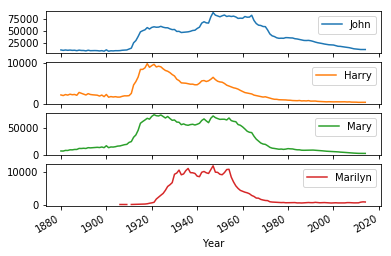

In [54]:
ax = top_names_Count_subset.plot(subplots = True)

# 남아 이름의 마지막 글자가 연도에 따라 어떻게 변화하였는지 분석하기

In [56]:
get_last_letter = lambda x: x[-1]

In [57]:
df.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [59]:
df['last_letters'] = df["Name"].apply(get_last_letter)

In [60]:
df.head()

,Id,Name,Year,Gender,Count,last_letters
0,1,Mary,1880,F,7065,y
1,2,Anna,1880,F,2604,a
2,3,Emma,1880,F,2003,a
3,4,Elizabeth,1880,F,1939,h
4,5,Minnie,1880,F,1746,e


In [62]:
last_letters_table = df.pivot_table('Count', index='last_letters', columns=['Gender', 'Year'], aggfunc=sum)

In [63]:
last_letters_table.head()

Gender              F                                                        \
Year             1880     1881     1882     1883     1884     1885     1886   
last_letters                                                                  
a             31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                 NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d               609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e             33380.0  34080.0  40399.0  41913.0  48089.0  49616.0  53884.0   

Gender                                     ...            M            \
Year             1887     1888     1889    ...         2005      2006   
last_letters                               ...                          
a             48942.0  59441.0  58632.0    ...      36877.0   36210.0   
b                 NaN      NaN      NaN    ...      43178.0   42645.0   
c                 NaN      NaN      NaN    ...      26102.0   26661.0   
d              1027.0   1298.0   1374.0    ...      50730.0   51474.0   
e             54353.0  66750.0  66661.0    ...     141237.0  143126.0   

Gender                                                                    \
Year              2007      2008      2009      2010      2011      2012   
last_letters                                                               
a              34723.0   32988.0   31573.0   28814.0   27384.0   27136.0   
b              42190.0   40047.0   39038.0   39208.0   36605.0   34626.0   
c              26893.0   25365.0   24127.0   23307.0   23085.0   24209.0   
d              50686.0   48018.0   46310.0   44758.0   43158.0   42376.0   
e             143915.0  141234.0  135857.0  130073.0  128572.0  128174.0   

Gender                            
Year              2013      2014  
last_letters                      
a              27299.0   27931.0  
b              33089.0   31085.0  
c              23970.0   23617.0  
d              42533.0   43641.0  
e             131725.0  131036.0  

[5 rows x 270 columns]

In [65]:
three_years_subtable = last_letters_table.reindex(columns = [1910, 1960, 2010], level='Year')

In [66]:
three_years_subtable.head()

Gender               F                            M                    
Year              1910      1960      2010     1910      1960      2010
last_letters                                                           
a             108397.0  691245.0  675901.0    977.0    5214.0   28814.0
b                  NaN     694.0     454.0    411.0    3912.0   39208.0
c                  5.0      49.0     953.0    482.0   15466.0   23307.0
d               6751.0    3728.0    2635.0  22113.0  262143.0   44758.0
e             133601.0  435048.0  316288.0  28665.0  178810.0  130073.0

In [67]:
three_years_letters_prop = three_years_subtable / three_years_subtable.sum()

In [68]:
three_years_letters_prop.head()

Gender               F                             M                    
Year              1910      1960      2010      1910      1960      2010
last_letters                                                            
a             0.273384  0.341846  0.381275  0.005030  0.002445  0.015056
b                  NaN  0.000343  0.000256  0.002116  0.001834  0.020486
c             0.000013  0.000024  0.000538  0.002482  0.007252  0.012178
d             0.017026  0.001844  0.001486  0.113857  0.122915  0.023386
e             0.336950  0.215147  0.178418  0.147592  0.083841  0.067964

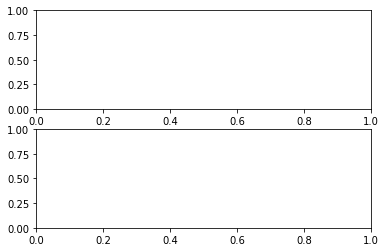

In [69]:
fig, axes = plt.subplots(2, 1)

In [75]:
three_years_letters_prop["M"].plot(kind = 'bar', ax=axes[0], title='Male')
three_years_letters_prop["F"].plot(kind = 'bar', ax=axes[1], title='Female')
plt.tight_layout()

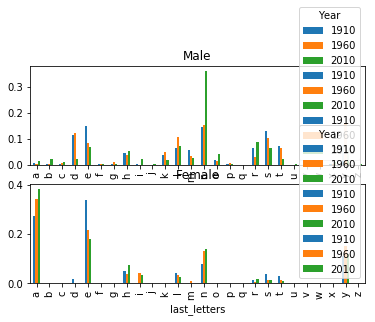

In [76]:
fig

In [77]:
last_letters_table.head()

Gender              F                                                        \
Year             1880     1881     1882     1883     1884     1885     1886   
last_letters                                                                  
a             31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                 NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d               609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e             33380.0  34080.0  40399.0  41913.0  48089.0  49616.0  53884.0   

Gender                                     ...            M            \
Year             1887     1888     1889    ...         2005      2006   
last_letters                               ...                          
a             48942.0  59441.0  58632.0    ...      36877.0   36210.0   
b                 NaN      NaN      NaN    ...      43178.0   42645.0   
c                 NaN      NaN      NaN    ...      26102.0   26661.0   
d              1027.0   1298.0   1374.0    ...      50730.0   51474.0   
e             54353.0  66750.0  66661.0    ...     141237.0  143126.0   

Gender                                                                    \
Year              2007      2008      2009      2010      2011      2012   
last_letters                                                               
a              34723.0   32988.0   31573.0   28814.0   27384.0   27136.0   
b              42190.0   40047.0   39038.0   39208.0   36605.0   34626.0   
c              26893.0   25365.0   24127.0   23307.0   23085.0   24209.0   
d              50686.0   48018.0   46310.0   44758.0   43158.0   42376.0   
e             143915.0  141234.0  135857.0  130073.0  128572.0  128174.0   

Gender                            
Year              2013      2014  
last_letters                      
a              27299.0   27931.0  
b              33089.0   31085.0  
c              23970.0   23617.0  
d              42533.0   43641.0  
e             131725.0  131036.0  

[5 rows x 270 columns]

In [78]:
letters_prop = last_letters_table / last_letters_table.sum()

In [79]:
letters_prop.head()

Gender               F                                                    \
Year              1880      1881      1882      1883      1884      1885   
last_letters                                                               
a             0.345587  0.343443  0.338767  0.341254  0.338547  0.341272   
b                  NaN       NaN       NaN       NaN       NaN       NaN   
c                  NaN       NaN  0.000046  0.000045       NaN       NaN   
d             0.006693  0.006601  0.006806  0.007211  0.007100  0.006479   
e             0.366841  0.370620  0.374585  0.373154  0.372719  0.372898   

Gender                                                  ...            M  \
Year              1886      1887      1888      1889    ...         2005   
last_letters                                            ...                
a             0.339710  0.335261  0.332766  0.328717    ...     0.018486   
b                  NaN       NaN       NaN       NaN    ...     0.021645   
c                  NaN       NaN       NaN       NaN    ...     0.013085   
d             0.006967  0.007035  0.007267  0.007703    ...     0.025431   
e             0.372809  0.372327  0.373684  0.373732    ...     0.070801   

Gender                                                                    \
Year              2006      2007      2008      2009      2010      2011   
last_letters                                                               
a             0.017643  0.016757  0.016200  0.015952  0.015056  0.014464   
b             0.020778  0.020361  0.019667  0.019723  0.020486  0.019335   
c             0.012990  0.012978  0.012456  0.012190  0.012178  0.012193   
d             0.025080  0.024461  0.023581  0.023397  0.023386  0.022796   
e             0.069737  0.069452  0.069359  0.068639  0.067964  0.067911   

Gender                                      
Year              2012      2013      2014  
last_letters                                
a             0.014362  0.014509  0.014690  
b             0.018326  0.017587  0.016349  
c             0.012813  0.012740  0.012421  
d             0.022428  0.022606  0.022952  
e             0.067838  0.070012  0.068916  

[5 rows x 270 columns]

In [80]:
dny_prop = letters_prop.loc[['d', 'n', 'y'], "M"]

In [81]:
dny_prop.head()

Year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
last_letters,,,,,,,,,,,,,,,,,,,,,
d,0.083057,0.083240,0.085339,0.084059,0.086120,0.085473,0.087648,0.089071,0.087710,0.091921,...,0.025431,0.025080,0.024461,0.023581,0.023397,0.023386,0.022796,0.022428,0.022606,0.022952
n,0.153216,0.153209,0.149558,0.151650,0.149924,0.146354,0.149661,0.148845,0.151291,0.151984,...,0.344296,0.351653,0.358228,0.361046,0.362462,0.362458,0.364154,0.360269,0.354485,0.351338
y,0.075762,0.077453,0.077537,0.079146,0.080405,0.081883,0.081681,0.082868,0.084921,0.086333,...,0.062807,0.060342,0.059643,0.060346,0.057242,0.058183,0.058074,0.057568,0.056305,0.055010


In [82]:
dny_prop.transpose()

last_letters,d,n,y
Year,,,
1880,0.083057,0.153216,0.075762
1881,0.083240,0.153209,0.077453
1882,0.085339,0.149558,0.077537
1883,0.084059,0.151650,0.079146
1884,0.086120,0.149924,0.080405
1885,0.085473,0.146354,0.081883
1886,0.087648,0.149661,0.081681
1887,0.089071,0.148845,0.082868
1888,0.087710,0.151291,0.084921


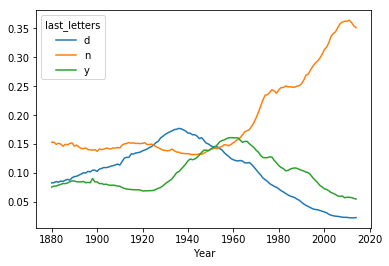

In [83]:
dny_prop.transpose().plot()